In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, Concatenate, Dropout, Lambda, Reshape
import tensorflow as tf
import rasterio as rio
from rasterio.merge import merge
import glob
import os

In [ ]:
list_blobs =  glob.glob('/dir/Model4/' +  '*.tif')

In [ ]:
print(len(list_blobs))

2921


In [ ]:
src_files_to_mosaic = []
for blob in list_blobs:
        img_multi = rio.open(blob)
        src_files_to_mosaic.append(img_multi)
mosaic, out_trans = merge(src_files_to_mosaic)
#show(mosaic, cmap='terrain')
nRows =  mosaic.shape[1]
nCols =  mosaic.shape[2]
#Bands = mosaic.shape[0]
#mosaic = mosaic.reshape(Bands, nRows,nCols)
with rio.open(
    '/dir/GeoTiff/Berlin2/Berlin_Mosaic4.tif',
    'w',
    driver='GTiff',
    height=nRows,
    width=nCols,
    count=1,
    dtype=mosaic.dtype,
    crs='+proj=latlong',
    transform=out_trans,
  ) as dst:
    dst.write(mosaic)

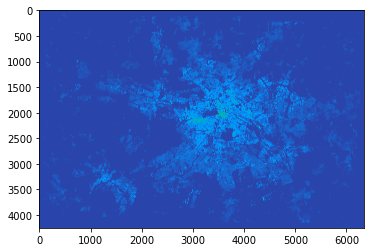

<AxesSubplot:>

In [ ]:
from rasterio.plot import show
show(mosaic[0,:,:], cmap='terrain')

In [ ]:
list_blobs =  glob.glob('/dir/GeoTiff/London2/Model1/' +  '*.tif')

In [ ]:
src_files_to_mosaic = []
for blob in list_blobs:
        img_multi = rio.open(blob)
        src_files_to_mosaic.append(img_multi)
mosaic, out_trans = merge(src_files_to_mosaic)
#show(mosaic, cmap='terrain')
nRows =  mosaic.shape[1]
nCols =  mosaic.shape[2]
#Bands = mosaic.shape[0]
#mosaic = mosaic.reshape(Bands, nRows,nCols)
with rio.open(
    '/dir/GeoTiff/London2/London_Mosaic1.tif' ,
    'w',
    driver='GTiff',
    height=nRows,
    width=nCols,
    count=1,
    dtype=mosaic.dtype,
    crs='+proj=latlong',
    transform=out_trans,
  ) as dst:
    dst.write(mosaic)